In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
df.dtypes


,0
animal name,object
hair,int64
feathers,int64
eggs,int64
milk,int64
airborne,int64
aquatic,int64
predator,int64
toothed,int64
backbone,int64


In [7]:
df.isna().sum().sum()

np.int64(0)

In [8]:
# No Null Values

In [9]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


# **1. Analyse the data using the visualizations**

In [10]:
#Scatter plot
#plot using px on data
fig = px.scatter(df, x="animal name", y="type")
fig.show()

In [11]:
#Histogram
for col in df.select_dtypes(include=np.number).columns:
    fig = px.histogram(df, x=col, nbins=30, title=f'Distribution of {col}')
    fig.update_layout(xaxis_title=col, yaxis_title='Frequency')
    fig.show()

In [12]:
data=df.select_dtypes(include=np.number)
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


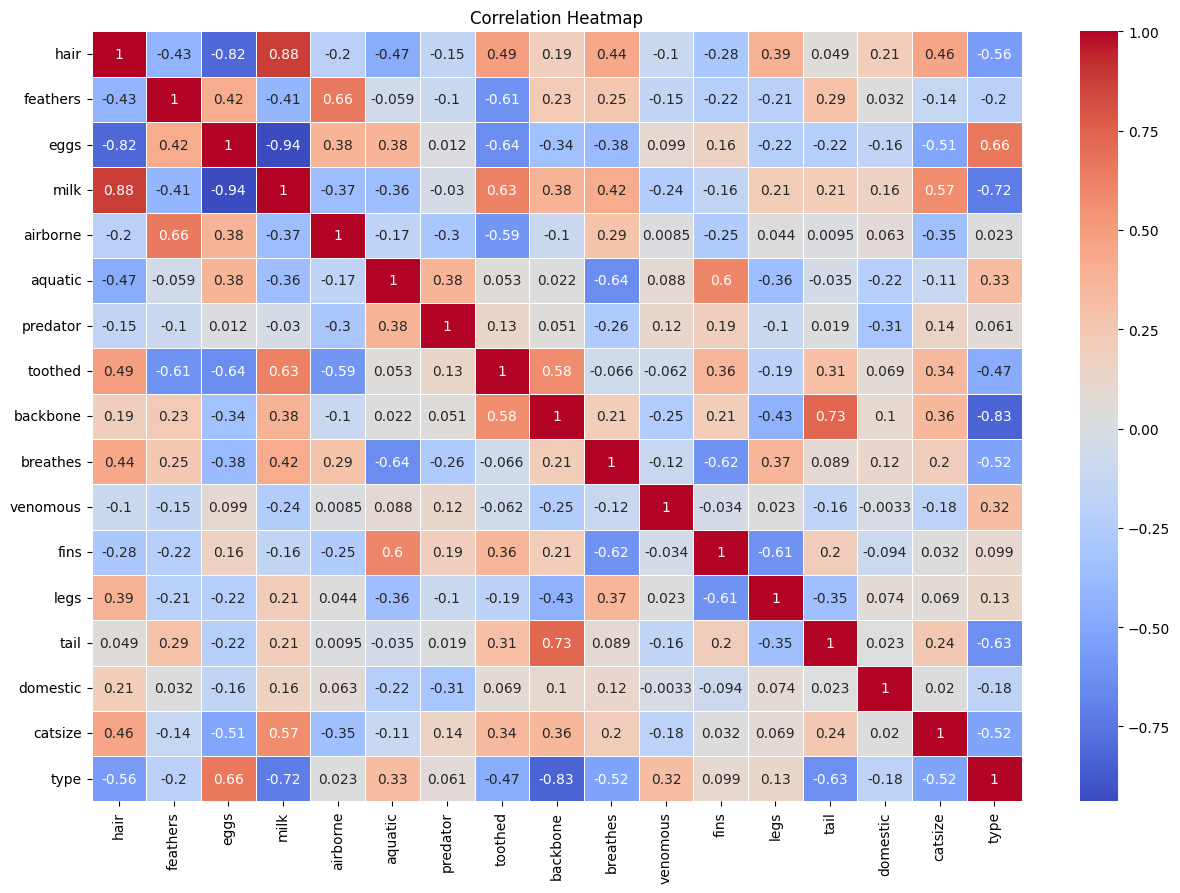

In [13]:
#Correlation
data=data.apply(pd.to_numeric, errors='coerce')
correlation_matrix = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **2. Preprocess the data by handling missing values & Outliers, if any.**

In [14]:
data.isnull().sum()

,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0
breathes,0


In [15]:
#Check for duplicates
data.duplicated().sum()

np.int64(42)

In [16]:
# Apply one-hot encoding to the "legs" column
data_encoded = pd.get_dummies(data, columns=['legs']).astype(int)
data_encoded.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,0,0,4,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0


In [18]:
data1=data_encoded.copy()
data1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,0,0,4,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,6,0,0,0,0,1,0
98,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,7,1,0,0,0,0,0


# **3. Split the dataset into training and testing sets(80% training, 20%testing).**

In [19]:
x=data1.drop('type',axis=1)
y=data1['type']
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size= .20, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 21) (21, 21) (80,) (21,)


# **4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset**

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [21]:
# Predict the target variable for the training set
y_train_pred = knn.predict(X_train)
y_train_pred

array([5, 5, 6, 1, 7, 6, 3, 1, 1, 2, 3, 1, 1, 2, 1, 1, 7, 1, 2, 7, 4, 4,
       2, 4, 1, 1, 1, 5, 3, 1, 7, 6, 1, 1, 4, 4, 2, 1, 1, 1, 6, 2, 2, 1,
       1, 1, 7, 1, 4, 1, 3, 2, 2, 1, 3, 2, 1, 1, 2, 2, 1, 7, 2, 1, 1, 3,
       2, 4, 2, 2, 7, 1, 4, 4, 2, 4, 2, 7, 4, 6])

In [22]:
# Evaluate the accuracy of the KNN classifier on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training set accuracy:", train_accuracy)

Training set accuracy: 0.975


In [23]:
y_pred=knn.predict(X_test)
print('Test set accuracy_score',accuracy_score(y_test,y_pred))

Test set accuracy_score 1.0


# **5. Choose an appropriate distance metric and value for K.**

In [24]:
#Use Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [25]:
x=data1.drop('type',axis=1)
y=data1['type']

In [26]:
num = numpy.array(range(1,40))
param_grid = dict(n_neighbors=num)

In [27]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [28]:
grid.best_score_


np.float64(0.96)

In [29]:
grid.best_params_

{'n_neighbors': np.int64(1)}

# **6.Evaluate the classifiers performance on the testing set using accuracy, precision, recall and F1-score metrics**

In [30]:
print('classification_report\n',classification_report(y_test,y_pred))

classification_report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



<Axes: >

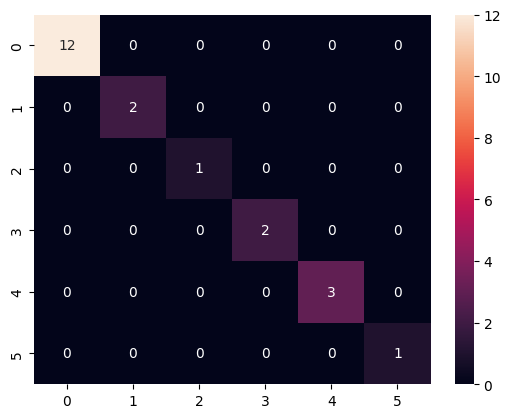

In [31]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

# **Visualizing the CV results**

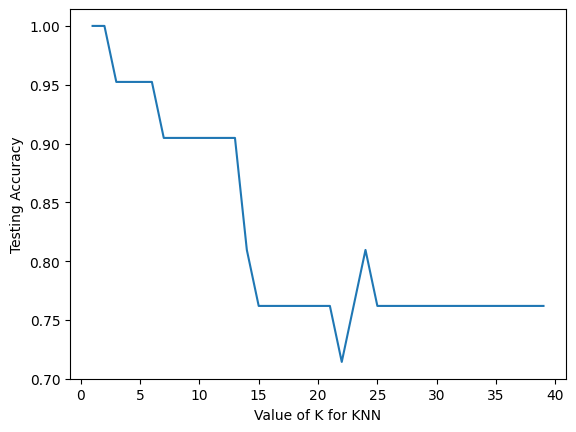

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
#choose k between 1 to 40
k_range = range(1,40)
k_score = []
#using looping
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score = knn.score(X_test,y_test)
    k_score.append(score)
#plot
plt.plot(k_range,k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

The grid search found that the best combination of parameters for your K-Nearest Neighbors classifier is using the Euclidean distance metric and setting the number of neighbors (K) to 3.  
 The best mean cross-validated score achieved with these parameters is 0.975.

In [33]:
#we can now use these best parameters to train your KNN classifier on the entire training dataset and evaluate its performance on the testing dataset

# **7. Visualize the decision boundaries of the classifier.**

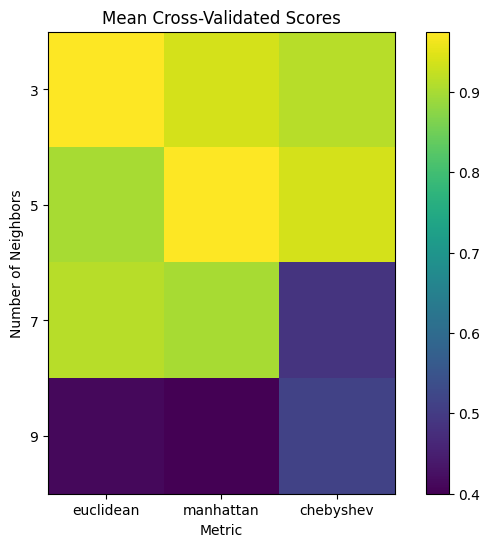

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Values for K
    'metric': ['euclidean', 'manhattan', 'chebyshev']  # Distance metrics to try
}

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Assuming X_train and y_train are defined elsewhere, fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Extract results from the grid search
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
params = results['params']

# Extract parameters and corresponding scores
n_neighbors_values = [params[i]['n_neighbors'] for i in range(len(params))]
metric_values = [params[i]['metric'] for i in range(len(params))]

# Create a 2D grid for heatmap
z = np.array(mean_scores).reshape(len(param_grid['n_neighbors']), len(param_grid['metric']))

# Plot heatmap using Matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(z, interpolation='nearest', cmap='viridis')

# Add colorbar
fig.colorbar(cax)

# Set ticks and labels
ax.set_xticks(np.arange(len(param_grid['metric'])))
ax.set_xticklabels(param_grid['metric'])
ax.set_yticks(np.arange(len(param_grid['n_neighbors'])))
ax.set_yticklabels(param_grid['n_neighbors'])

# Set axis labels and title
ax.set_xlabel('Metric')
ax.set_ylabel('Number of Neighbors')
ax.set_title('Mean Cross-Validated Scores')

plt.show()

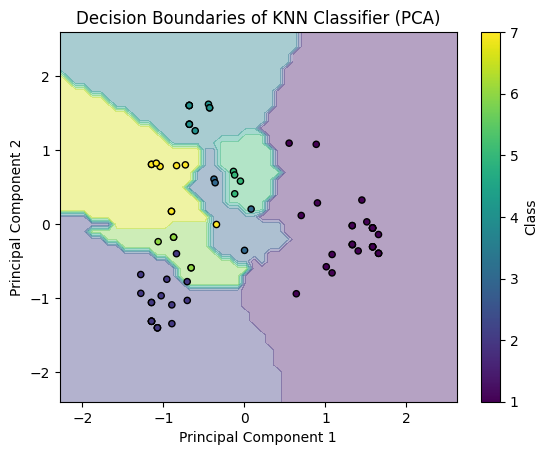

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Assuming X_train and y_train are defined elsewhere

# Reshape X_train to 2D if it has more than 2 dimensions
if X_train.ndim > 2:
    X_train = X_train.reshape(X_train.shape[0], -1) # Reshape to (num_samples, num_features)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Initialize the K-Nearest Neighbors classifier with the best parameters
best_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Train the KNN classifier on the entire training dataset
best_knn.fit(X_train_pca, y_train)

# Create a meshgrid to plot decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the meshgrid
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries of KNN Classifier (PCA)')
plt.colorbar(label='Class')
plt.show()

# **Interview Questions**

### Here are answers to the interview questions regarding K-Nearest Neighbors (KNN):

##**1.What are the key hyperparameters in KNN?**

Key hyperparameters in KNN:

**n_neighbors:**

This hyperparameter determines the number of neighbors used for classification. A higher value typically leads to smoother decision boundaries but might increase computational complexity.

**weights:**

This hyperparameter determines the weight function used in prediction. It can be set to 'uniform', where all points in each neighborhood are weighted equally, or 'distance', where closer neighbors have more influence than farther neighbors.

**metric:**

This hyperparameter specifies the distance metric used to measure the distance between points. Common choices include Euclidean distance, Manhattan distance, and Chebyshev distance.

**algorithm:**

This hyperparameter specifies the algorithm used to compute nearest neighbors. Options include 'brute', 'kd_tree', and 'ball_tree', each with its own advantages and disadvantages in terms of speed and memory usage.

##**2.What distance metrics can be used in KNN?**
- **Euclidean Distance**: The most common distance metric, defined as the straight-line distance between two points in Euclidean space. It works well when the data is continuous.
- **Manhattan Distance** (L1 norm): Also known as city block distance, it sums the absolute differences between the feature values. This is often used when the data has high dimensionality or when feature magnitudes vary greatly.
- **Minkowski Distance**: A generalization of both Euclidean and Manhattan distances. It has a parameter `p` that controls the type of distance:
     - When `p = 1`, it becomes Manhattan distance.
     - When `p = 2`, it becomes Euclidean distance.
- **Chebyshev Distance**: This is the maximum absolute difference along any coordinate dimension. It is useful in specific grid-like scenarios.
- **Hamming Distance**: Used for categorical data, where the distance is simply the number of positions at which corresponding symbols are different.
  